## TP2: Visión por Computadora I (CEIA)
### Nombre: Pablo Segovia

Implementar la función create_gauss_filter(h, w, k_size, sigma)para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper“Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [65]:
# Importamos las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [125]:
# Generamos la función que pide la consigna
def create_gauss_filter(h, w, k_size, sigma):
    # Generar el kernel gaussiano
    gaussian = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    
    # Transformar gaussiano en matricial
    gaussian = gaussian @ gaussian.T
    
    # Ajustar el tamaño del filtro al tamaño deseado (h x w)
    gaussian = cv.resize(gaussian, (w, h))

    # Normalizar el filtro para que sea la suma 1
    gaussian /= np.sum(gaussian)
    
    # Pasar el gaussiano por su transformada de furier 2D
    gaussian_fft = np.fft.fft2(gaussian)
    
    # Pasar al centro
    gaussian_fft = np.fft.fftshift(gaussian_fft)
    
    gaussian_fft = 20*np.log(np.abs(gaussian_fft))
    
    return gaussian, gaussian_fft
    
    

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.

In [90]:
# Generamos los diferentes tamaños de kernel y los sigmas
k_sizes = [5, 9, 13, 17, 21]
sigmas = [1.0, 3.0, 5.0, 7.0, 11.0]

In [124]:
""" for k_size in k_sizes:
    for sigma in sigmas: 
        kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)

        plt.figure(figsize=(12,12))
        plt.subplot(1,2,1)
        plt.axis('off')
        plt.title(f"Kernel Gausiano de k_size={k_size} y sigma={sigma}")
        plt.imshow(kernel, cmap='jet')
        plt.subplot(1,2,2)
        plt.axis('off')
        plt.title(f"FFT del kernel de k_size={k_size} y sigma={sigma}")
        plt.imshow(kernel_tf, cmap='jet') """

' for k_size in k_sizes:\n    for sigma in sigmas: \n        kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)\n\n        plt.figure(figsize=(12,12))\n        plt.subplot(1,2,1)\n        plt.axis(\'off\')\n        plt.title(f"Kernel Gausiano de k_size={k_size} y sigma={sigma}")\n        plt.imshow(kernel, cmap=\'jet\')\n        plt.subplot(1,2,2)\n        plt.axis(\'off\')\n        plt.title(f"FFT del kernel de k_size={k_size} y sigma={sigma}")\n        plt.imshow(kernel_tf, cmap=\'jet\') '

#### Probamos una imagen para ver su impacto

Text(0.5, 1.0, 'Desenfoque gausiano')

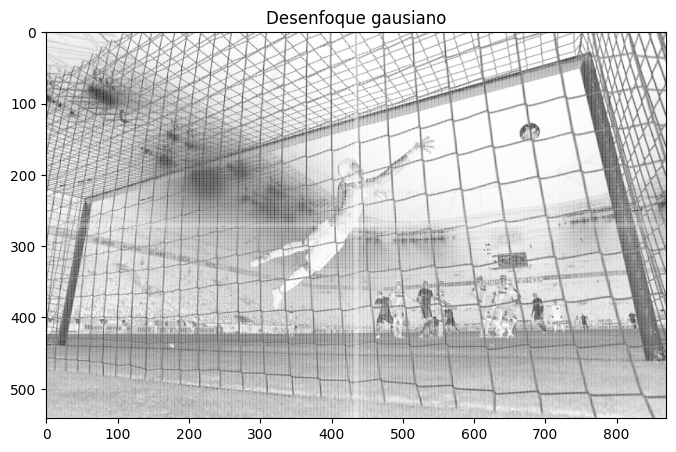

In [128]:
# Importamos la imagen así conocemos h y w
img = cv.imread('/Users/manoloacademia/Documents/CEIA/03 - Vision 1/vision_computadora_I/Codigo/Clase3/golazo.jpg',
                cv.IMREAD_GRAYSCALE)
h,w = img.shape
kernel, kernel_tf = create_gauss_filter(h, w, k_size=5, sigma=1.0)

#img_gauss = img * kernel
#shifted_fft = np.fft.fftshift(np.fft.fft2(img))

img_fft = img * kernel_tf
#lp_filtered = shifted_fft * lp_filter
#hp_filtered = shifted_fft * hp_filter

# Aplicamos la antitransformada y obtenemos las imagenes filtradas
#img_fft = np.fft.ifftshift(img_fft)
#img_fft = np.real(np.fft.ifft2(img_fft))
#f_ishift = np.fft.ifftshift(hp_filtered)
#img_hp = np.real(np.fft.ifft2(f_ishift))


plt.figure(figsize=(8,8))
plt.imshow(img_fft, cmap='grey')
plt.title('Desenfoque gausiano')